## Convolutional Neural Network (CNN or ConvNets)

#### Download data
First we download the data here: https://www.kaggle.com/zalando-research/fashionmnist and put the folder containing the files in the same directory as this notebook.

#### Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

** To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
** For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.

#### Labels

Each training and test example is assigned to one of the following labels: 

** 0 T-shirt/top,  
** 1 Trouser,  
** 2 Pullover,  
** 3 Dress,  
** 4 Coat,  
** 5 Sandal,  
** 6 Shirt,  
** 7 Sneaker,  
** 8 Bag,  
** 9 Ankle boot 

In [0]:
# Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [0]:
training_data = pd.read_csv("./fashion-mnist_train.csv")
testing_data = pd.read_csv("./fashion-mnist_test.csv")

In [0]:
training_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


### Exploring data
- 1) How many data we have in the "training_data" and "testing_data"? Use the **shape** function to have a size of the data
- 2) Plot images with their labels as titles
- 3) Prepare the data: separate the into input and output and scale the input so that the pixel values are between 0 and 1 (range used by Keras)
- 4) Split the train data into train and validate datas.
- 5) 2D Convolution layer of keras use input of the form: (Batch_size, image_dim_1, image_dim_2, channel_dim). Batch_size here is the number of examples. channel_dim is the number of color channels. Reshape the data into 4D array.

In [0]:
# 1) size of training and testing data
print("training_data shape :", training_data.shape)
print("testing_data shape :", testing_data.shape)

training_data shape : (60000, 785)
testing_data shape : (10000, 785)


In [0]:
# Converge to arrays
training_data = np.array(training_data)
testing_data = np.array(testing_data)

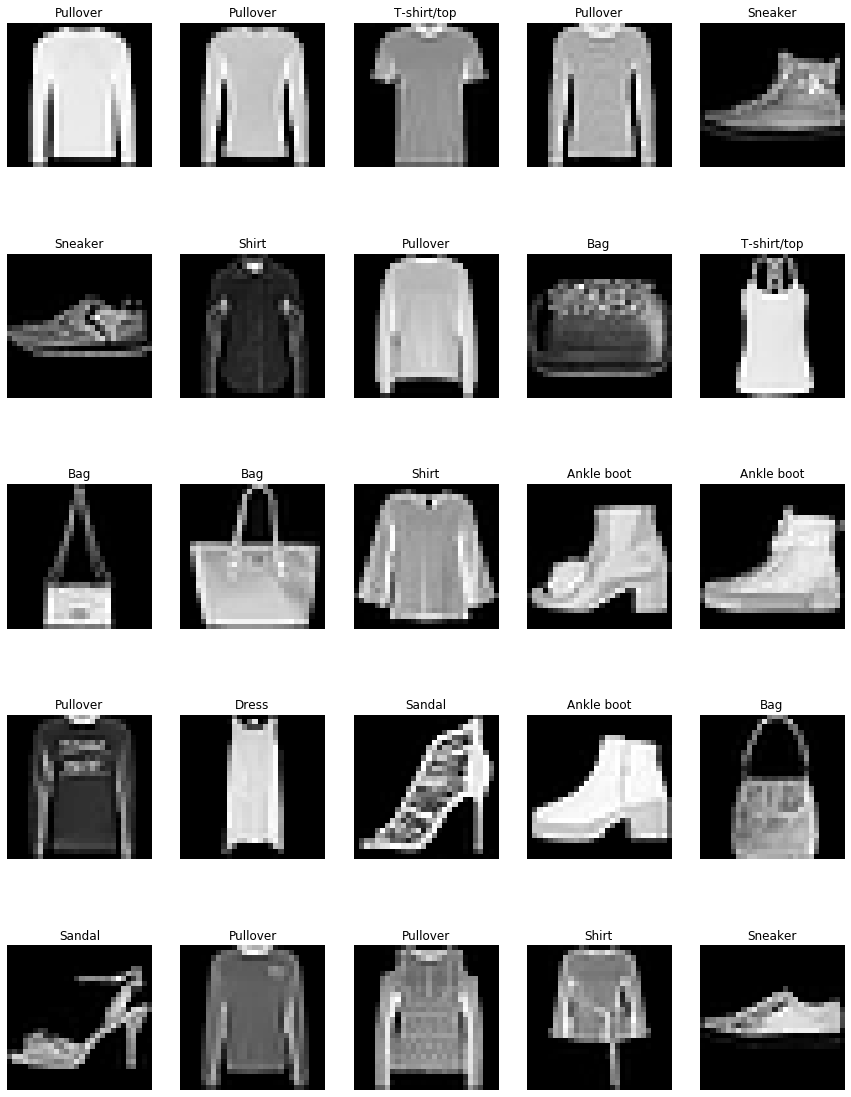

In [0]:
# 2) 
# Dimensions of the plot grid 
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,20))
axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array 
number_training = len(training_data) # get the length of the training dataset
images_labels= {"0" : "T-shirt/top", "1" : "Trouser", "2" : "Pullover",
                "3" : "Dress", "4" : "Coat", "5" : "Sandal", "6" : "Shirt",
                "7" : "Sneaker", "8" : "Bag", "9" : "Ankle boot"}

# Select a random number from 0 to n_training
for i in range(W_grid * L_grid):  
    # Select a random number
    rnd_num = np.random.randint(number_training+1, size=(1,1))
    # read and display an image with the selected index to display apply methods for each figure axes[i]  
    image=np.reshape(training_data[rnd_num,1:], (28,28)) 
    plt.subplot(L_grid, W_grid, i+1)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.title(images_labels.get(str(training_data[rnd_num,0][0][0])))

plt.subplots_adjust(hspace=0.4)

In [0]:
# 3)  Prepare the training and testing datasets
X_train = training_data[:,1:] 
y_train = training_data[:, 0]
X_test = testing_data[:,1:]
y_test = testing_data[:,0]

In [0]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (60000, 784)
y_train shape : (60000,)
X_test shape : (10000, 784)
y_test shape : (10000,)


In [0]:
# Scale the input so that the pixel values are between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
# 4) Split the train data into train and validate datas.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1 ,random_state=42)

print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_val shape :", X_val.shape)
print("y_val shape :", y_val.shape)

X_train shape : (54000, 784)
y_train shape : (54000,)
X_val shape : (6000, 784)
y_val shape : (6000,)


In [0]:
# 5)  Reshape the dataset into 4D array

X_train = np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val = np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test = np.reshape(X_test, (X_test.shape[0],28,28,1))

In [0]:
print("X_train shape :", X_train.shape)
print("X_val shape :", X_val.shape)
print("X_test shape :", X_test.shape)

X_train shape : (54000, 28, 28, 1)
X_val shape : (6000, 28, 28, 1)
X_test shape : (10000, 28, 28, 1)


 For any information about Keras you can consult the official documentation https://keras.io/ 
- 6) Architecture of Convolutional Neural Network with:
    
    - 1 Input layer
    - 1 Convolution Layer with 
        - 32 filters and a kernel size of 5 
        - ReLU activations
    - Max Pooling with a kernel 2x2 and stride 2
    - 1 Convolution Layer with 64 filters and a kernel size of 3
        - 64 filters and a kernel size of 3 
        - ReLU activation
    - Max Pooling with a kernel 2x2 and stride 2
    - Flatten()
    - 1 Fully connected layer with 32 neurons
    - 1 Output layer

- 7) Compile the model. https://keras.io/losses/
- 8) Train the model. (we may also use the validate data) 
- 9) Evaluate the model (with the test data)
- 10) Make a prediction from the test data
- 11) Plot some test images with their classes and predicted clases
- 12) Make a confusion matrix
- 13) Display a classification report

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
# 6) Train the model: make the architecture of the model

num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train,num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val,num_classes=num_classes)

model = Sequential()
input_shape = X_train.shape[1:]  # (28, 28, 1)
model.add(Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
# 7) compile the model  
loss = keras.losses.categorical_crossentropy
optimizer = Adam()
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                51232     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [0]:
# 8) train the model
# We can train with more epochs for better fit. It will demand more time
epochs = 5
batch_size = 1000

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 37s - loss: 1.0802 - acc: 0.6298 - val_loss: 0.6404 - val_acc: 0.7572
Epoch 2/5
 - 37s - loss: 0.5703 - acc: 0.7900 - val_loss: 0.5038 - val_acc: 0.8180
Epoch 3/5
 - 37s - loss: 0.4814 - acc: 0.8267 - val_loss: 0.4390 - val_acc: 0.8490
Epoch 4/5
 - 37s - loss: 0.4397 - acc: 0.8457 - val_loss: 0.4108 - val_acc: 0.8573
Epoch 5/5
 - 37s - loss: 0.4087 - acc: 0.8566 - val_loss: 0.3908 - val_acc: 0.8640


In [0]:
# 9) evaluate the model

pred_loss, pred_acc = model.evaluate(X_test, y_test)
print(f'Evaluation : Testing loss = {pred_loss} \t Testing loss = {pred_acc}')

10000/10000 [==============================] - 3s 283us/step
Evaluation : Testing loss = 0.38919735541343686 	 Testing loss = 0.864


In [0]:
# 10) make prediction classes
predicted_classes = model.predict(X_test)

In [0]:
np.round(predicted_classes)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

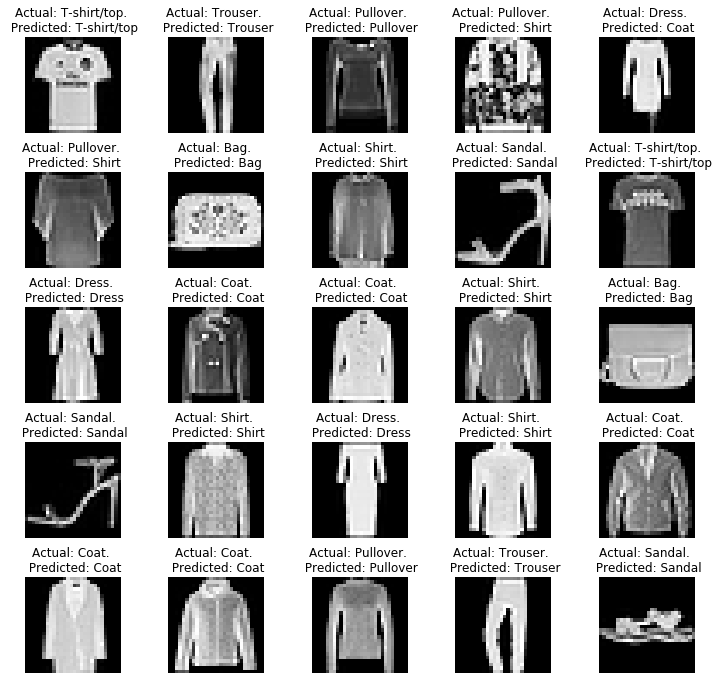

In [0]:
# 11) plot the prediction classes for some testing examples
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    # Select a random number
    plt.subplot(L, W, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap='gray')
    plt.axis('off')
    true_label = images_labels[str(np.argmax(y_test[i]))]
    pred_label = images_labels[str(np.argmax(predicted_classes[i]))]
    plt.title('Actual: {}. \n Predicted: {}'.format(true_label, pred_label))

plt.subplots_adjust(wspace=0.5)


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


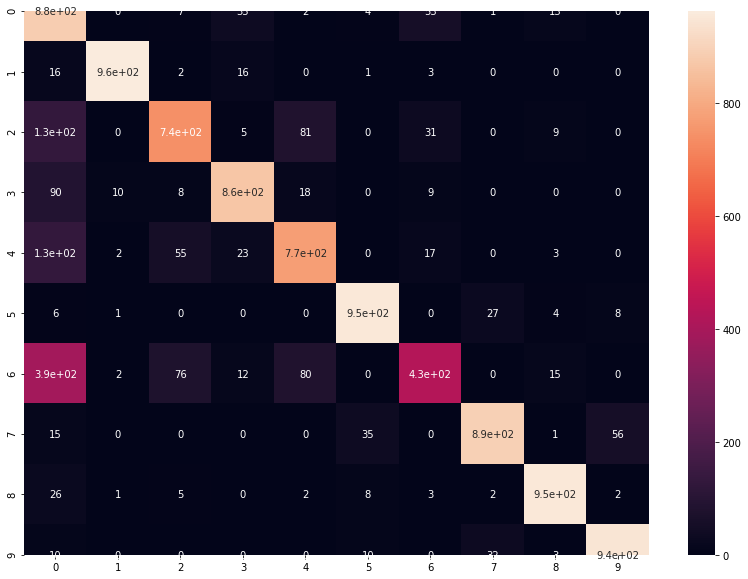

In [0]:
# 12) display confusion matrix
from sklearn.metrics import confusion_matrix

y_true=np.argmax(y_test,axis = 1)
y_pred=np.argmax(np.round(predicted_classes),axis = 1)
target_names = list(images_labels.values())
print(list(images_labels.values()))

plt.figure(figsize = (14,10))
sns.heatmap(confusion_matrix(y_true=y_true, y_pred=y_pred), annot=True)

In [0]:
# 13) classification report
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.52      0.89      0.66      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.83      0.74      0.78      1000
       Dress       0.90      0.86      0.88      1000
        Coat       0.81      0.77      0.79      1000
      Sandal       0.94      0.95      0.95      1000
       Shirt       0.79      0.43      0.55      1000
     Sneaker       0.94      0.89      0.91      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.84     10000

